In [1]:
# import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
import numpy as np


filename = 'imdb.csv'

def gen_df(filename):

    # Get .csv.file
    data = pd.read_csv(filename, sep=';', encoding='latin-1', escapechar='\\')

    # Read file into pandas dataframe
    df = pd.DataFrame(data)

    # Drop unwanted columns
    for i in range(44,48):
        df.drop(columns=[f'Unnamed: {i}'], inplace=True)

    df.drop(columns=['fn','wordsInTitle','url'], inplace=True)

    # Keep only observations of movie-type
    I = df['type'] == 'video.movie'
    df = df.loc[I]
    df.drop(columns=['type'], inplace=True)

    # Drop observations with missing data
    df.dropna(inplace=True)

    # Replace 0's in imdb-ratings
    df['imdbRating'] = df['imdbRating'].astype(str)
    df['imdbRating'].replace(regex=True, inplace=True,to_replace='0',value='')
    df['imdbRating'] = df['imdbRating'].astype(float)

    # Transform duration from seconds to hours
    df['duration'] = df['duration']/60**2

    # Drop years before 1920 and 2014 because of few obervations
    I = (df['year']>=1920) & (df['year']<=2013)
    df = df.loc[I]

    # Change the type of 'year' to integer
    df['year'] = df['year'].astype(int)    
    
    # Sort observations and reset index
    df.sort_values('year', inplace=True)
    df.reset_index(inplace=True)


    # Generating variable that shows the decade (as a string)
    year_list = [1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]

    df['decade'] = ''
    for i,start in enumerate(year_list):
        end = start+10
        df.loc[(df['year'] >= start) & (df['year'] < end), 'decade'] = f'{year_list[i]}s'

    return df

df = gen_df(filename)

df.head(10)

,index,tid,title,imdbRating,ratingCount,duration,year,nrOfWins,nrOfNominations,nrOfPhotos,...,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western,decade
0,2200,tt0011565,The Penalty (1920),7.6,1095.0,1.500000,1920,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1920s
1,502,tt0011841,MÌ_dchenlos (1920),8.1,3134.0,2.416667,1920,0.0,0.0,18.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1920s
2,12832,tt0011865,Irrwege einer Ehe (1920),8.2,1042.0,1.500000,1920,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1920s
3,12148,tt0010323,Das Cabinet des Dr. Caligari (1920),8.1,29379.0,1.300000,1920,0.0,0.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1920s
4,12368,tt0011071,Buster Keaton als StrÌ_fling (1920),7.1,1474.0,0.333333,1920,0.0,0.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1920s
5,12618,tt0011541,One Week (1920),8.2,3574.0,0.416667,1920,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1920s
6,12555,tt0011508,Neighbors (1920),7.7,1808.0,0.300000,1920,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1920s
7,12484,tt0011237,Der Golem; wie er in die Welt kam (1920),7.3,3977.0,1.516667,1920,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1920s
8,12424,tt0011130,Dr. Jekyll and Mr. Hyde (1920),7.1,2796.0,0.816667,1920,0.0,0.0,16.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1920s
9,477,tt0011909,The Affairs of Anatol (1921),8.1,999.0,1.950000,1921,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1920s


index                 int64
tid                  object
title                object
imdbRating          float64
ratingCount         float64
duration            float64
year                  int64
nrOfWins            float64
nrOfNominations     float64
nrOfPhotos          float64
nrOfNewsArticles    float64
nrOfUserReviews     float64
nrOfGenre           float64
Action              float64
Adult               float64
Adventure           float64
Animation           float64
Biography           float64
Comedy              float64
Crime               float64
Documentary         float64
Drama               float64
Family              float64
Fantasy             float64
FilmNoir            float64
GameShow            float64
History             float64
Horror              float64
Music               float64
Musical             float64
Mystery             float64
News                float64
RealityTV           float64
Romance             float64
SciFi               float64
Short               

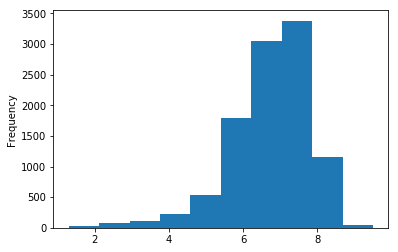

In [2]:
# Summary Stats
print(df.dtypes)
df["imdbRating"].plot(kind="hist", bins=10)

In [3]:
# Generating genre list
genre = ['Action', 'Adult', 'Adventure', 'Animation', 'Biography',
         'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
         'FilmNoir', 'GameShow', 'History', 'Horror', 'Music', 'Musical',
         'Mystery', 'News', 'RealityTV', 'Romance', 'SciFi', 'Short', 'Sport',
         'TalkShow', 'Thriller', 'War', 'Western']


# Counting movies in each genre
for i in genre: 
    sum = df[i].sum(axis=0)
    print(f'Sum of {i}: {sum:.0f}')


Sum of Action: 1772
Sum of Adult: 16
Sum of Adventure: 1456
Sum of Animation: 534
Sum of Biography: 541
Sum of Comedy: 3327
Sum of Crime: 1638
Sum of Documentary: 778
Sum of Drama: 5109
Sum of Family: 685
Sum of Fantasy: 679
Sum of FilmNoir: 190
Sum of GameShow: 2
Sum of History: 460
Sum of Horror: 935
Sum of Music: 269
Sum of Musical: 332
Sum of Mystery: 750
Sum of News: 2
Sum of RealityTV: 2
Sum of Romance: 1707
Sum of SciFi: 731
Sum of Short: 380
Sum of Sport: 205
Sum of TalkShow: 3
Sum of Thriller: 1235
Sum of War: 442
Sum of Western: 292


In [4]:
# Summary Statistics 
# print(df[['year','imdbRating']].groupby('year').mean())

df[["year", "imdbRating", "duration", "nrOfWins", "nrOfNominations"]].describe() 

,year,imdbRating,duration,nrOfWins,nrOfNominations
count,10372.000000,10372.000000,10372.000000,10372.000000,10372.000000
mean,1987.274682,6.738151,1.714428,3.470980,4.129772
std,22.925591,1.068080,0.537806,8.492359,9.457900
min,1920.000000,1.300000,0.016667,0.000000,0.000000
25%,1972.000000,6.200000,1.500000,0.000000,0.000000
50%,1996.000000,6.900000,1.675000,1.000000,0.000000
75%,2005.000000,7.500000,1.933333,3.000000,4.000000
max,2013.000000,9.500000,12.833333,137.000000,137.000000


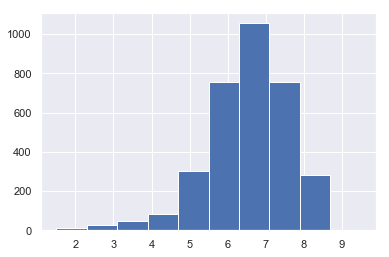

interactive(children=(Dropdown(description='Genre', index=5, options=('Action', 'Adult', 'Adventure', 'Animati…

In [5]:
# Histogram
import seaborn as sns
sns.set()

# plt.hist(df["imdbRating"], bins=10)


# Histogram by genre
df_hist = df.loc[df["Comedy"] == 1]
plt.hist(df_hist["imdbRating"], bins=10)


# Interactive Histogram
def histogram(variable, genre, bins_num):
        df_hist = df.loc[df[genre] == 1]
        plt.hist(df_hist[variable], bins=bins_num)
    
        # Labels
        plt.title("Histogram")
        plt.ylabel("Number")
        plt.xticks(range(1,11))
    
# histogram("imdbRating", "Comedy")   # Remember quote marks around variable names. 


def hist_interactive(variable): 
    widgets.interact(histogram, 
    variable = widgets.fixed(variable), 
    
    # Genre Dropdown
    genre = widgets.Dropdown(
    description="Genre", 
    options=genre, 
    value="Comedy"),
    
    # Bins slider 
    bins_num=widgets.IntSlider(
    value=10,
    description="Bins", 
    min=1,
    max=50, 
    step=1,
    disabled=False,
    continuous_update=False)
    ); 

hist_interactive("imdbRating")



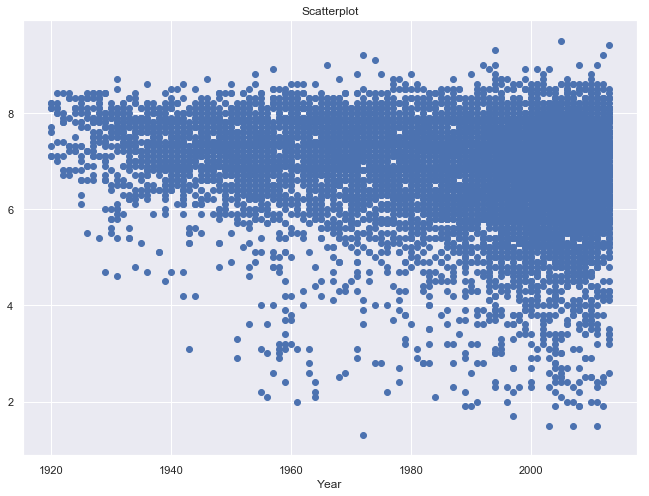

In [6]:
# Scatterplot
def scatter(variable):
    plt.figure(figsize=(11,8))
    plt.scatter(df['year'], variable)
    
    plt.title("Scatterplot")
    plt.xlabel("Year")

scatter(df["imdbRating"])    


# df[df["nrOfWins"] == 137]
# df[df["nrOfNominations"] == 137]


In [137]:
# df[df["nrOfWins"] < df["nrOfNominations"]]

Text(0, 0.5, 'Nr. of Wins')

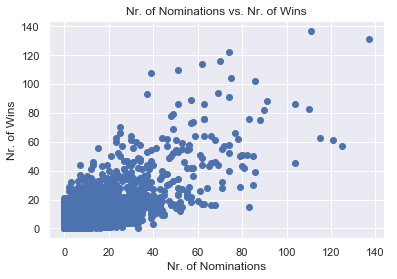

In [7]:
plt.scatter(df['nrOfNominations'], df["nrOfWins"])
plt.title("Nr. of Nominations vs. Nr. of Wins")
plt.xlabel("Nr. of Nominations")
plt.ylabel("Nr. of Wins")

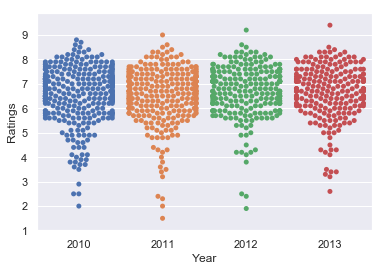

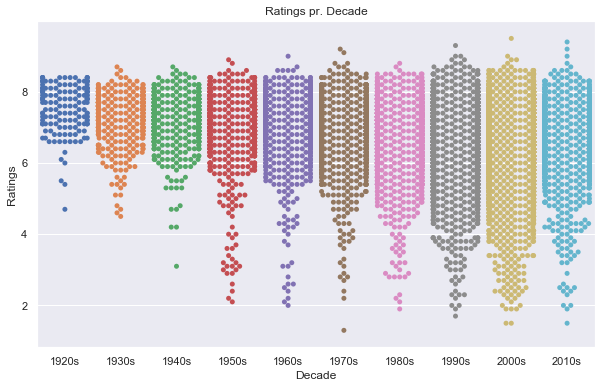

In [19]:
# Swarm plot (Consider comparing decades)
def swarm_plot_year(y="imdbRating"): 
    df_swarm = df.loc[df["year"] >= 2010]
    sns.swarmplot(x = "year", y = y, data=df_swarm)
    plt.xlabel("Year")
    plt.ylabel("Ratings")

swarm_plot_year()


# Swarm plot (Consider comparing decades)
def swarm_plot(y="imdbRating"): 
    fig = plt.figure(figsize=(10,6))
    ax1 = fig.add_subplot(1,1,1)
    ax1 = sns.swarmplot(x = "decade", y = y, data=df)
    if y == "imdbRating": 
        ax1.set_title("Ratings pr. Decade")
        ax1.set_ylabel("Ratings")
    elif y == "nrOfWins": 
        ax1.set_title("Wins pr. Decade")
        ax1.set_ylabel("Nr. of Wins")
    elif y == "nrOfNominations": 
        ax1.set_title("Nominations pr. Decade")
        ax1.set_ylabel("Nr. of Nominations")
    elif y == "duration": 
        ax1.set_title("Duration pr. Decade")
        ax1.set_ylabel("Duration")
    else: 
        ax1.set_title(f"{y} pr. Decade")
        ax1.set_ylabel(y)
    ax1.set_xlabel("Decade")
    

swarm_plot()
# swarm_plot(y="nrOfWins")


# Consider duration and ratingCount

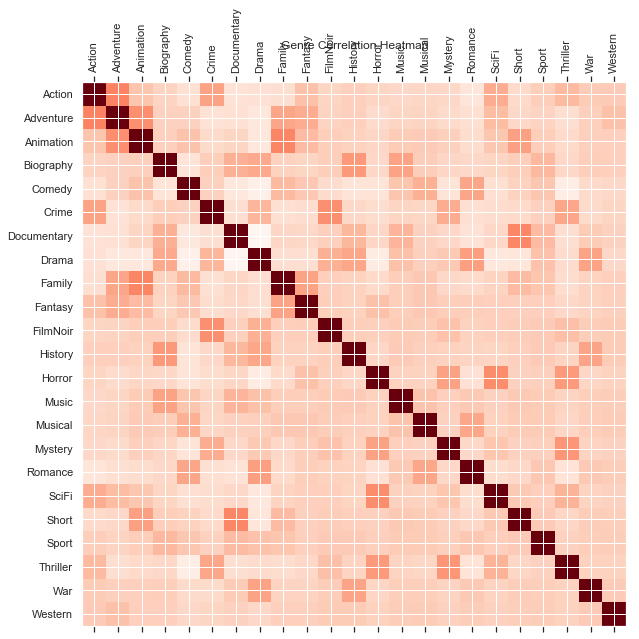

In [17]:
# Heat map between genres
genre_new = ['Action', 'Adventure', 'Animation', 'Biography',
         'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
         'FilmNoir', 'History', 'Horror', 'Music', 'Musical',
         'Mystery', 'Romance', 'SciFi', 'Short', 'Sport', 'Thriller', 'War', 'Western']


corr = df[genre_new].corr()
# print(corr)

fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(corr, cmap=plt.cm.Reds)
plt.title("Genre Correlation Heatmap")
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns);


# f, ax = plt.subplots(figsize=(10, 10))
#sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.color_palette("Blues"),
#            square=True, ax=ax);